In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import linear_model

from mnist import MNIST
from sklearn.preprocessing import OneHotEncoder


In [2]:
def dataload():
    mnistdata = MNIST('./data/')
    X_train, y_train = map(np.array, mnistdata.load_training())
    X_test, y_test = map(np.array, mnistdata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    X_train = np.asarray(X_train).reshape(60000, 784)
    y_train = np.asarray(y_train).reshape(60000, 1)
    X_test = np.asarray(X_test).reshape(10000, 784)
    y_test = np.asarray(y_test).reshape(10000, 1)
    return X_train, y_train, X_test, y_test
def plot(x):
    image = x.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [3]:
if __name__ == "__main__":

    X_train, y_train, X_test, y_test = dataload()
    enc= OneHotEncoder()
    enc.fit(y_train)
    y_train_new = enc.transform(y_train).toarray()
    lm = linear_model.LinearRegression()
    lm.fit(X_train, y_train_new)
    prediction = lm.predict(X_test)
    prediction_train = lm.predict(X_train)
    pred_labels_test = np.argmax(prediction, axis = 1)
    pred_labels_test.reshape(10000,1)
    pred_labels_train = np.argmax(prediction_train, axis = 1)
    pred_labels_train.reshape(60000,1)

print("Train accuracy: {0}".format(metrics.accuracy_score(y_train, pred_labels_train)))
print("Test accuracy: {0}".format(metrics.accuracy_score(y_test,pred_labels_test)))

    


Train accuracy: 0.8576833333333334
Test accuracy: 0.8603


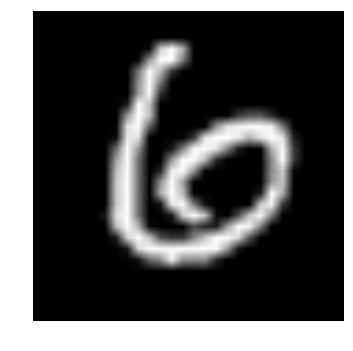

In [18]:
#==== Plot first mis-classified data ====
    # (Use the provided plot(x) function)
misclassified_point = np.where(np.any(labels_test != pred_labels_test.reshape(10000,1), axis=1))[0][0]
plot(X_test[misclassified_point])

In [19]:
print ("Predicted label is:", pred_labels_test[misclassified_point])
print ("True label is:", labels_test[misclassified_point])

Predicted label is: 4
True label is: [6]
